# 使用ecCodes加载GRIB2文件

首先加载需要使用的库。

In [1]:
import eccodes
import numpy as np

## 单个要素场

从 GRAPES GFS 的原始分辨率 GRIB 2 数据中加载 850hPa 温度场。

In [2]:
from nwpc_data.grib.eccodes import load_message_from_file

t = load_message_from_file(
    file_path="/g1/COMMONDATA/OPER/NWPC/GRAPES_GFS_GMF/Prod-grib/2020031721/ORIG/gmf.gra.2020031800105.grb2",
    parameter="t",
    level_type="isobaricInhPa",
    level=850,
)
t

94423684298144

使用 ecCodes Python API 读取要素场的数据值，返回 numpy 一维数组。

使用 `reshape` 方法转换为二维数组。

In [2]:
data = eccodes.codes_get_double_array(t, "values")
data = data.reshape([720, 1440])
data

array([[249.19234375, 249.16234375, 249.16234375, ..., 249.15234375,
        249.19234375, 249.14234375],
       [249.45234375, 249.45234375, 249.42234375, ..., 249.45234375,
        249.44234375, 249.44234375],
       [249.69234375, 249.68234375, 249.68234375, ..., 249.70234375,
        249.67234375, 249.68234375],
       ...,
       [235.33234375, 235.45234375, 235.62234375, ..., 235.47234375,
        235.63234375, 235.48234375],
       [235.78234375, 235.91234375, 235.64234375, ..., 235.80234375,
        235.72234375, 235.82234375],
       [235.66234375, 235.86234375, 235.82234375, ..., 235.85234375,
        235.68234375, 235.70234375]])

使用 `matplotlib.pyplot.imshow` 快速绘图。

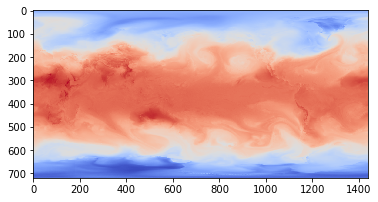

In [3]:
import matplotlib.pyplot as plt
plt.imshow(data, cmap="coolwarm")

**注意**：需要使用 `eccodes.codes_release()` 函数手动释放GRIB消息。

In [4]:
eccodes.codes_release(t)

## 批量加载

加载所有等压面层的温度场

In [5]:
from nwpc_data.grib.eccodes import load_messages_from_file

tset = load_messages_from_file(
    file_path="/g1/COMMONDATA/OPER/NWPC/GRAPES_GFS_GMF/Prod-grib/2020031721/ORIG/gmf.gra.2020031800105.grb2",
    parameter="t",
    level_type="isobaricInhPa",
)
tset

[94030833871584,
 94030846548880,
 94030834795856,
 94030835117648,
 94030850971776,
 94030851283456,
 94030846874640,
 94030854213184,
 94030855033376,
 94030855824752,
 94030847057200,
 94030847371632,
 94030859736112,
 94030860872880,
 94030861998896,
 94030863095024,
 94030864146544,
 94030865184464,
 94030866235888,
 94030867288528,
 94030868347776,
 94030869412752,
 94030870466976,
 94030871484144,
 94030856821680,
 94030856732592,
 94030856651392,
 94030856586656,
 94030875226608,
 94030875892656,
 94030876600176,
 94030856155824,
 94030856470256,
 94030878957968,
 94030876948672,
 94030877263168,
 94030879751824]

In [6]:
len(tset)

37

**注意**：需要手动释放所有的GRIB2消息

In [7]:
for message in tset:
    eccodes.codes_release(message)